In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
config_file = '../snakemake/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = '../'+expand(config['data']['ab'], species='human')[0]
filt_ab = '../'+expand(config['data']['filt_ab'], species='human')[0]
read_annot = '../'+expand(config['data']['read_annot'], species='human')[0]
t_metadata = '../'+expand(config['ref']['cerberus']['t_info'], species='human')[0]
lib_meta = '../'+expand(config['data']['meta'], species='human')[0]
swan_file = '../'+expand(config['data']['sg'], species='human')[0]
cerberus_h5 = '../'+expand(config['data']['cerb_annot'], species='human')[0]
cerb_t_metadata = '../'+expand(config['data']['t_info'], species='human')[0]
major_isos = '../'+expand(config['data']['major_isos'], species='human', obs_col='sample')[0]

ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'polya'
obs_col = 'sample'
go_gene_subset = 'protein_coding'

m_lib_meta = '../'+expand(config['data']['meta'], species='mouse')[0]

## Density plots for protein coding genes for GENCODE v40, observed, observed major

{'source': 'v40', 'biotype_category': ['protein_coding', 'lncRNA', 'pseudogene']}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 33772
{'source': 'obs_det', 'biotype_category': ['protein_coding', 'lncRNA', 'pseudogene']}
{'source': 'obs_major', 'biotype_category': ['protein_coding', 'lncRNA', 'pseudogene']}
figsize changed


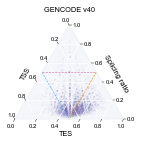

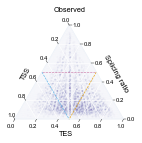

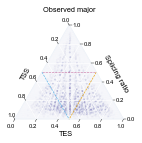

<Figure size 144x1440 with 0 Axes>

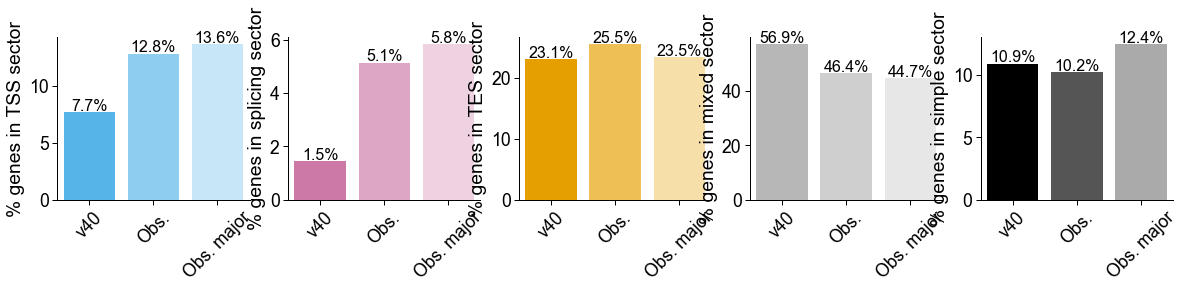

In [4]:
sources = ['v40', 'obs_det', 'obs_major']
titles = ['GENCODE v40', 'Observed', 'Observed major']
plot_density_simplices(cerberus_h5, 
                       ab,
                       min_tpm,
                       sources,
                       titles, 
                       gene_subset,
                       ver)

## Simplex plot for AKAP8L

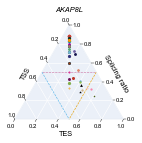

In [5]:
plot_obs_human_simplex_with_centroid(cerberus_h5,
                  'AKAP8L',
                  'figures/', 
                  source='sample_det',
                  gene_subset=gene_subset,
                  ver=ver)

## AKAP8L browser plots

Read in graph from ../data/human/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples


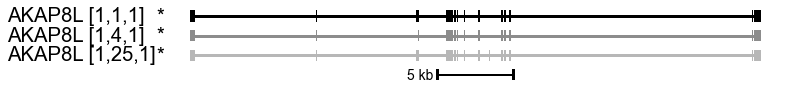

In [6]:
plot_browser_isos_2(cerberus_h5,
                    swan_file, 
                    filt_ab,
                    major_isos,
                    'AKAP8L',
                    obs_col,
                    'h9',
                    'figures/akap8l_h9_browser_isos.pdf',
                    h=0.2,
                    ref_sources=['v29', 'v40'])

In [ ]:
plot_browser_isos_2(cerberus_h5,
                    swan_file, 
                    filt_ab,
                    major_isos,
                    'AKAP8L',
                    obs_col,
                    'h9_panc_progen',
                    'figures/akap8l_h9_panc_progen_browser_isos.pdf',
                    h=0.2,
                    ref_sources=['v29', 'v40'])

Read in graph from ../data/human/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples


## Gene triplets with splicing ratio for AKAP8L

In [ ]:
# triplets for H9 and H9-derived panc. progen.
ca = cerberus.read(cerberus_h5)
ca.triplets.loc[(ca.triplets.source=='sample_det')&\
                (ca.triplets['sample'].isin(['h9', 'h9_panc_progen']))&\
                (ca.triplets.gname=='AKAP8L')]

## Sample-level centroid vs. sample-level triplets distances

In [ ]:
source = 'sample_det'
ca = cerberus.read(cerberus_h5)
ca = get_centroids(ca,
                   source=source,
                   gene_subset=gene_subset,
                   ver=ver)
df = compute_dists([ca,ca], 
                   sources=[source,f'{source}_centroid'],
                   gene_subsets=[gene_subset,gene_subset],
                   ver=[ver, ver])

n = len(df.loc[df.z_score > 3, 'gid'].unique().tolist())
print(f'{n} genes have sample-level triplet vs. sample-level centroid z-score >3')

In [ ]:
df.loc[(df.gname=='AKAP8L')&(df.sample_sample_det=='h9_panc_progen')]

## How many genes w/ > 1 det. isoform are in one of the corners of the simplex? 

In [ ]:
ca = cerberus.read(cerberus_h5)
df = ca.triplets.loc[(ca.triplets.source=='obs_det')&\
                       (ca.triplets.n_iso>1)]

# limit to protein coding
gene_subset='protein_coding'
gene_df, _, _ = get_gtf_info(how='gene', ver=ver)
gene_df['gid_stable'] = cerberus.get_stable_gid(gene_df, 'gid')
df = df.merge(gene_df[['gid_stable', 'biotype_category']],
                  how='left', left_on='gid', right_on='gid_stable')
df = df.loc[df.biotype_category == gene_subset]
df.drop(['biotype_category', 'gid_stable'], axis=1, inplace=True)

In [ ]:
df = df[['gid', 'sector']].groupby('sector').count().reset_index()
n = df.gid.sum()
n_num = df.loc[df.sector.isin(['splicing', 'tss', 'tes'])].gid.sum()
print(f'{(n_num/n)*100:.2f} of genes w/ >1 isoform ({n_num}/{n}) are in tss, splicing, or tes sectors')
